In [11]:
from scipy.stats import norm
import scipy.integrate as integrate
import autograd.numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

This algorithm estimates the value of an integral using monte carlo simulation. Let $g(x)$ be any integrand whose integral is difficult or computationally expensive to compute. If $g(x)$ can be represented as $f(x)h(x)$, where $f(x)$ is a (common) probability distribution function (pdf), then,

$\int_a^b g(x) \; dx = \int_a^b f(x)h(x) \; dx = E_{f}[h(x)]$ (Note: $f$ must be manipulated so that $\int_a^b f(x) \; dx = 1$)



The latter expression can be approximated fairly precisely by drawing values randomly from the underlying distribution function ($f$), and evaluating $h$ at those values, then taking the average.

Example: Evaluation of $\int_{-\infty}^{\infty} x^2e^{-x^2} \; dx$.

First, let's actually compute the value of this integral:

In [12]:
integralVal = integrate.quad(lambda x: x**2 * np.exp(-x**2), -1 * np.inf, np.inf)[0]
print('the value of the integral is', np.round(integralVal,4))

the value of the integral is 0.8862


Now, let's try approximating it. Recall that the pdf of the normal distribution is given by,

$N(\mu,\sigma)$ = $\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{{(x-\mu)}^2}{2\sigma^2}}$

Then,

$N(0,\sqrt{\frac{1}{2}})$ = $\frac{1}{\sqrt{\pi}}e^{-x^2}$

Therefore,

$\int_{-\infty}^{\infty} x^2e^{-x^2} \; dx = \int_{-\infty}^{\infty} (\sqrt{\pi}*\frac{1}{\sqrt{\pi}})x^2e^{-x^2} \; dx = \int_{-\infty}^{\infty} (\frac{1}{\sqrt{\pi}}e^{-x^2})(\sqrt{\pi}x^2) \; dx = E_{f}[\sqrt{\pi}x^2]$ where $f$~$N(0,\sqrt{\frac{1}{2}})$

Now we can approximate the value of the integral by randomly sampling points from $f$ and evaluating the average of $h(x) = \sqrt{\pi}x^2$ at these values:

In [13]:
h = lambda x: np.sqrt(np.pi)*np.square(x)                  #defining h(x)

mean = 0
std = np.sqrt(1/2)
mag = 8
aprox = []

for i in range(1,mag+1):
    x = np.random.normal(size=10**i,loc=mean,scale=std)    #generating 10^i values from distribution
    aprox.append(np.mean(h(x)))                            #pass values through h and compute average

In [14]:
index = np.argmin(np.abs(integralVal - np.asarray(aprox)))
print('The closest approximation of the integral was',round(aprox[index],4), 'which was computed with a sample of size 10^',index+1)
print('the error in this estimation is', np.round(np.abs(integralVal - aprox[index]),8))

The closest approximation of the integral was 0.8863 which was computed with a sample of size 10^ 8
the error in this estimation is 5.708e-05


When we plot the approximated integral value for each generated sample taken, you can see that the approximated value converges to the true value as the sample size increases:

<IPython.core.display.Javascript object>


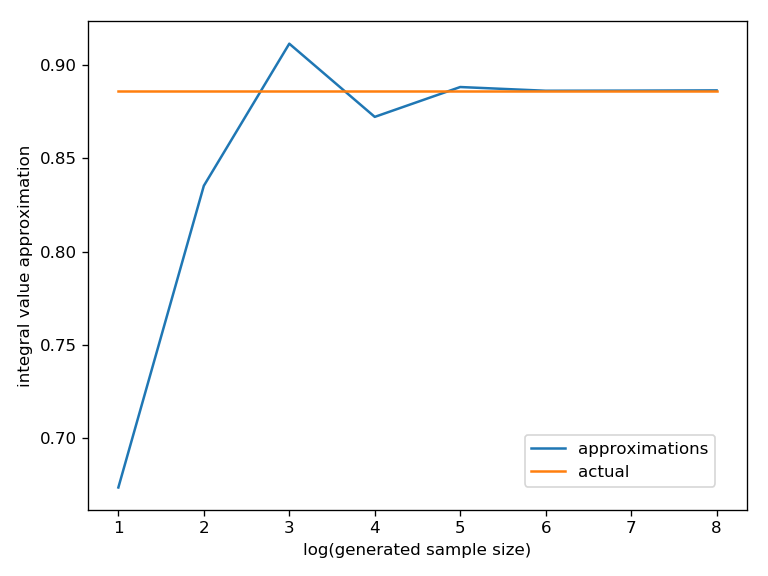

In [16]:
axis = np.linspace(1,mag,mag)
t = integralVal*np.ones(mag)
plt.figure()
plt.plot(axis,aprox)
plt.plot(axis,t)
plt.xlabel('log(generated sample size)')
plt.ylabel('integral value approximation')
plt.legend(['approximations','actual'],loc='center left', bbox_to_anchor=(0.65, 0.1))
plt.show()